In [1]:
# Importing Libraries

# Linear Algebra
import numpy as np

# Data preprocessing
import pandas as pd

# Plotting Of Graph
import matplotlib.pyplot as plt
import seaborn as am

# Our Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Dimensional Reduction
from sklearn.decomposition import PCA

In [2]:
# Reading the Train and Test data 
train=pd.read_csv(r"E:\bh rkm\train.csv")
test=pd.read_csv(r"E:\bh rkm\test.csv")

# Concatenating the test and train data 
df=pd.concat([train,test],sort=False,ignore_index=True)


In [3]:
# Finding the Columns which have many null values


# Getting the information about the test data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142981 entries, 0 to 142980
Data columns (total 15 columns):
TID               142981 non-null int64
Date              142981 non-null object
Property Type     142981 non-null object
OldvNew           142981 non-null object
Duration          142981 non-null object
AddressLine1      142981 non-null object
AddressLine2      19354 non-null object
Street            140320 non-null object
Locality          54109 non-null object
Town              142981 non-null object
Taluka            142981 non-null object
District          142981 non-null object
Postcode          142328 non-null object
Price             142981 non-null float64
Price Category    142981 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 16.4+ MB


In [4]:
# Getting the information about the train data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61277 entries, 0 to 61276
Data columns (total 14 columns):
TID               61277 non-null int64
Date              61277 non-null object
Property Type     61277 non-null object
OldvNew           61277 non-null object
Duration          61277 non-null object
AddressLine1      61277 non-null object
AddressLine2      8173 non-null object
Street            60119 non-null object
Locality          23379 non-null object
Town              61277 non-null object
Taluka            61277 non-null object
District          61277 non-null object
Postcode          60959 non-null object
Price Category    61277 non-null object
dtypes: int64(1), object(13)
memory usage: 6.5+ MB


In [5]:
# We can drop the column 'Street' ,'AddressLine2' and 'Locality' because it has many null values.

df=df.drop(['Street','Locality','AddressLine2'],axis=1)
df

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,Town,Taluka,District,Postcode,Price,Price Category
0,909733,26-11-2018,T,N,F,57,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.0,A
1,827610,26-10-2018,T,N,L,4,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.0,A
2,680513,07-09-2018,D,Y,F,5,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.5,A
3,798754,19-10-2018,S,N,F,55,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.1,A
4,612097,17-08-2018,S,N,F,20,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
204253,231603,05-04-2018,S,Y,F,37,HUXRLJXMYGB,HUXRLJXMYGB ULF FBULB,OUNCXORKB,KJ50 3UA,NaN,A
204254,178145,16-03-2018,D,N,F,03U,FKRVVRBEF,BUXM KRFRLJ YV QYKGXORKB,BUXM KRFRLJ YV QYKGXORKB,QY54 8AT,NaN,A
204255,932469,30-11-2018,S,Y,F,8,HYKFYL,BUXM OUNCXORKB,OUNCXORKB,JW64 7JZ,NaN,A
204256,521298,19-07-2018,S,N,F,7,OYKXOUN,OYKXOUN,ZBXM XWXXBA,KO05 1LA,NaN,A


In [6]:
# we have mostly categorical values in our data

# Lets first analyse explore our categorical feature

In [7]:
# value count of each feature in column

df['OldvNew'].value_counts()

N    178644
Y     25614
Name: OldvNew, dtype: int64

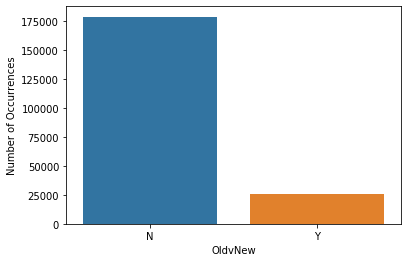

In [8]:
# Plotting a bar graph of the number of occurances in category listed in the column 'OldvNew'

oldvnew_count= df['OldvNew'].value_counts()
plt.figure()
am.barplot(oldvnew_count.index, oldvnew_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('OldvNew')
plt.show()

In [9]:
# Correlation of 'OldvNew' with 'Price'

df[['OldvNew','Price']].groupby('OldvNew').mean()

,Price
OldvNew,
N,262.530579
Y,303.419463


In [10]:
# We can map 'N' as 0 and 'Y' as 1 

df['OldvNew']=df['OldvNew'].map({'N':1,'Y':2}).astype(int)

In [11]:
# value count of each feature in column

df['Property Type'].value_counts()

T    55760
S    54905
D    46606
F    36632
O    10355
Name: Property Type, dtype: int64

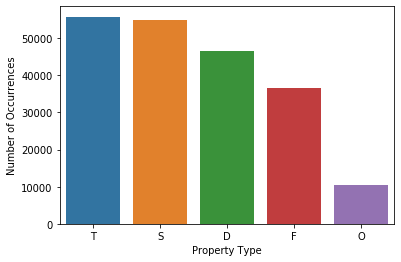

In [12]:
# Plotting a bar graph of the number of occurances in category listed in the column 'OldvNew'

prop_type_count= df['Property Type'].value_counts()
plt.figure()
am.barplot(prop_type_count.index, prop_type_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Property Type')
plt.show()

In [13]:
# Correlation of 'Property Type' and 'Price'

df[['Property Type','Price']].groupby('Property Type').mean()

,Price
Property Type,
D,368.283437
F,255.050157
O,276.701257
S,243.330430
T,214.139613


In [14]:
# we can consider Property as a ordinal data and map as 'T':1,'S':3,'F':4,'O':5,'D':11

df['Property Type']=df['Property Type'].map({'T':1,'S':3,'F':4,'O':5,'D':11}).astype(int)

In [15]:
# value count of each feature in column

df['Duration'].value_counts()

F    155601
L     48657
Name: Duration, dtype: int64

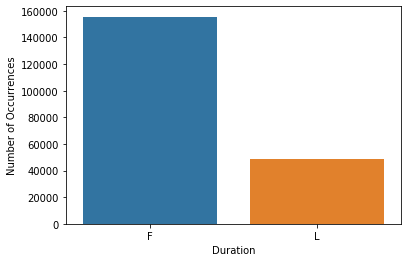

In [16]:
# Plotting a bar graph of the number of occurances in category listed in the column 'OldvNew'

duration_count= df['Duration'].value_counts()
plt.figure()
am.barplot(duration_count.index, duration_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Duration')
plt.show()

In [17]:
# Correlation of 'Duration' and 'Price'

df[['Duration','Price']].groupby('Duration').mean()

,Price
Duration,
F,277.231413
L,237.065413


In [18]:
# We can map 'F' as 1 and 'L' as 0 

df['Duration']=df['Duration'].map({'L':1,'F':2}).astype(int)

In [19]:
df['Price Category'].value_counts()

A    175946
B     28312
Name: Price Category, dtype: int64

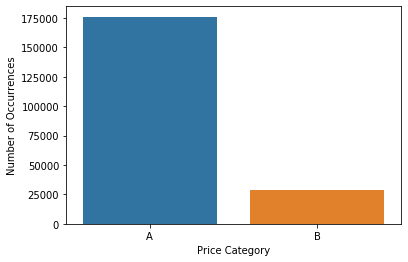

In [20]:
# Plotting a bar graph of the number of occurances in category listed in the column 'Price Category'

duration_count= df['Price Category'].value_counts()
plt.figure()
am.barplot(duration_count.index, duration_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Price Category')
plt.show()

In [21]:
# Correlation of 'Price Category' and 'Price'

df[['Price Category','Price']].groupby('Price Category').mean()

,Price
Price Category,
A,272.156027
B,239.789699


In [22]:
# We can map 'B' as 1 and 'A' as 2 

df['Price Category']=df['Price Category'].map({'B':1,'A':2}).astype(int)

In [23]:
# No of unique District

df['District'].value_counts().shape[0]

113

In [24]:
t=df[['District','Price']].groupby('District').mean()
sorted_t = t.sort_values(by='Price')

sorted_t

,Price
District,
HEUBLUW JZBLM,94.282520
HEUSGCYYE,120.146799
KOYLFFU SQLYL MUVV,120.173017
SRMQ YV GRLJXMYL WCYL OWEE,121.920458
XMYGB-YL-MKBLM,124.700595
...,...
OBKMVYKFXORKB,410.202076
ZYGRLJOUN,437.515725
XWKKBQ,442.752764


In [25]:
# No of unique Taluka

df['Taluka'].value_counts().shape[0]

353

In [26]:
# No of unique Town

df['Town'].value_counts().shape[0]

1138

In [27]:
# No of Rows in our Train Dataset
ltrain=train.shape[0]

# Target Variable of our Dataset
y=train['Price']

# Test TID Column
tid=test['TID']


In [28]:
# Dropping Postcode, Town, AddressLine1 due to many unique value
# It will not be affordable to get dummies of the above one
# we will also drop AddressLine2 and Locality because it have many null elements

data=df[['District','Taluka','Price Category','OldvNew','Duration','Property Type']]
data=pd.get_dummies(data)

In [29]:
x=data[:ltrain]
testdata=data[ltrain:]

In [30]:
x

,Price Category,OldvNew,Duration,Property Type,District_BUXM KRFRLJ YV QYKGXORKB,District_BUXM XWXXBA,District_BXXBA,District_CBNHKYGBXORKB,District_CYKMXNYWMO,District_CYYEB,...,Taluka_ZUKZRSG,Taluka_ZULFXZYKMO,Taluka_ZUMVYKF,Taluka_ZUPBKEBQ,Taluka_ZUPBLBQ,Taluka_ZYEPBKOUNCMYL,Taluka_ZYGRLJ,Taluka_ZYGRLJOUN,Taluka_ZYKMORLJ,Taluka_ZYKSBXMBK
0,2,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,2,1,2,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142977,2,2,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142978,2,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142979,2,1,2,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# We got a huge no of columns by getting dummies of the data.So we have to reduce the no of columns.
# For this we will use Dimensional Reductional Technique, PCA(Principle Component Analysis)
# to remove the columns which doesn't provide significant amount of information to us


# Applying PCA function on training data and testdata
 
  
pca = PCA() 
  
x = pca.fit_transform(x) 
testdata = pca.transform(testdata) 
  
pca.explained_variance_ratio_

array([8.51471258e-01, 1.23489404e-02, 7.43397623e-03, 6.57339669e-03,
       5.23911634e-03, 3.17842992e-03, 3.10688275e-03, 2.80460658e-03,
       1.93796065e-03, 1.87587173e-03, 1.79898176e-03, 1.74883148e-03,
       1.68482507e-03, 1.59053727e-03, 1.46741821e-03, 1.36358664e-03,
       1.29702587e-03, 1.24437719e-03, 1.23032882e-03, 1.19678316e-03,
       1.18268580e-03, 1.17775733e-03, 1.15723199e-03, 1.14658136e-03,
       1.14340774e-03, 1.13796187e-03, 1.09925308e-03, 1.07881672e-03,
       1.07485185e-03, 1.01797607e-03, 9.76401726e-04, 9.62415535e-04,
       9.43732000e-04, 9.33690478e-04, 9.13982609e-04, 8.90272858e-04,
       8.72894346e-04, 8.60815042e-04, 8.46688410e-04, 8.39767745e-04,
       8.26730355e-04, 8.16250101e-04, 8.04267107e-04, 7.97075999e-04,
       7.59591033e-04, 7.43348570e-04, 7.25168503e-04, 7.20321902e-04,
       6.74417092e-04, 6.65340954e-04, 6.47589988e-04, 6.27561519e-04,
       6.22429298e-04, 6.17163278e-04, 6.10552142e-04, 6.10295366e-04,
      

In [32]:
# We can see last 114 element doesn't contribute significantly information. So, we will drop the last 114 element.
pca=PCA(n_components=356)
x = pca.fit_transform(x) 
testdata = pca.transform(testdata) 

# We have prepared our Raw Data

In [33]:
# Finally Traing our model

lm=LinearRegression().fit(x,np.log(y))
lm.coef_


array([ 6.23125737e-02, -2.18052625e-02, -2.41275503e-01,  1.12925193e-01,
        9.00936333e-01,  2.50010273e-03, -2.37886864e-01, -3.79020007e-02,
        3.55650434e-01, -1.58576870e-01,  4.11854692e-01, -1.51093424e-01,
        4.38683829e-01, -4.44987325e-02, -7.78409186e-04, -3.73149041e-01,
       -1.28761640e-01,  1.95408416e-01, -5.86113725e-01,  7.41783636e-02,
       -2.74116968e-01, -4.93095288e-02, -7.95563225e-01,  4.26584900e-02,
       -1.21269869e-01, -2.36951760e-01, -1.72221865e-01, -1.56647571e-01,
        1.19017213e-01,  2.27374222e-01,  1.76506823e-01,  2.04469675e-01,
       -4.32805065e-02, -2.34199041e-01,  1.31278998e-01, -1.43094447e-01,
       -2.90362975e-01,  3.15105230e-02,  1.53273411e-01, -2.90511530e-02,
        6.90805109e-02, -1.16214111e-01, -3.34921042e-01, -3.94353852e-02,
       -1.45991061e-01,  3.01662493e-01,  2.52989842e-01,  3.23308181e-01,
       -1.68008322e-01,  1.95781026e-01,  2.26359854e-01, -8.55900520e-02,
        9.05249253e-02,  

In [34]:
y_pred=lm.predict(testdata)
y_pred=np.exp(y_pred)
y_pred

array([258.0362839 , 155.56502228, 150.02349377, ..., 355.80822479,
       334.63380821, 116.91537914])

In [35]:
output = pd.DataFrame({'TID': tid, 'Price': y_pred})
output.to_csv('prediction.csv', index=False)